# Robustify your sensitivity indices estimates through repetitions

In this notebook we'll see an example of robustified sensitivity analysis by performing **50** repetitions of the assessment.

In [33]:
%matplotlib inline
from Functions import A1, A2, B1, B2, B3, C1, C2
import numpy as np
import pandas as pd
import sobol_seq
import matplotlib.pyplot as plt
from pandas import ExcelWriter
plt.style.use('ggplot')

### Defining the test functions and their analytical values

In [34]:
k = 6

a2 = np.array([0,0.5,3,9,99,99])
b3 = np.array([6.42,6.42,6.42,6.42,6.42,6.42])

functions = [A1, A2, B1, B2, B3, C1, C2]

AE_df = pd.read_excel('AE_df.xlsx',index_col=0) #the analytical values

def scrambler(q,s):
    return q+s

### It is then time to define the sample and scrambled matrices

In [35]:
p = 14
run = 50

n = 2

df = pd.DataFrame(sobol_seq.i4_sobol_generate(2*k,-1+2**p))
df2 = pd.DataFrame(np.random.rand(-1+2**p,2*k))

We define here a sequence to scramble the columns across our 50 repetitions

In [36]:
df_index = pd.concat([pd.Series(np.random.choice(2*k,size=2*k,replace=False)) for r in range(run)],axis=1).T

df_index

,0,1,2,3,4,5,6,7,8,9,10,11
0,9,1,10,7,3,8,4,0,11,2,6,5
1,9,1,8,7,2,5,10,6,4,3,0,11
2,6,2,7,1,4,3,0,10,8,9,11,5
3,6,2,1,4,7,9,5,10,0,3,11,8
4,9,7,1,6,10,0,8,3,11,4,5,2
5,4,3,6,8,11,10,9,0,7,2,5,1
6,6,3,4,7,11,0,8,5,9,2,1,10
7,7,8,6,1,0,11,5,3,2,9,10,4
8,7,4,9,2,0,3,5,10,11,1,6,8
9,2,7,1,10,3,11,0,6,5,8,9,4


And assemble a multi-repetition dataframe out of this

In [37]:
df_r = pd.concat([df.T.reindex(df_index.iloc[r]).reset_index(drop=True).T for r in range(run)])
df_rand = pd.concat([df2.T.reindex(df_index.iloc[r]).reset_index(drop=True).T for r in range(run)])

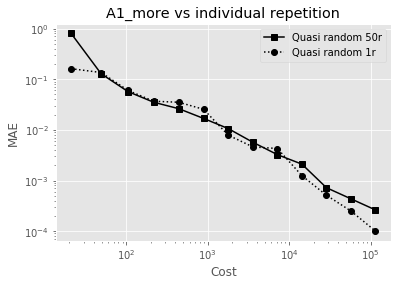

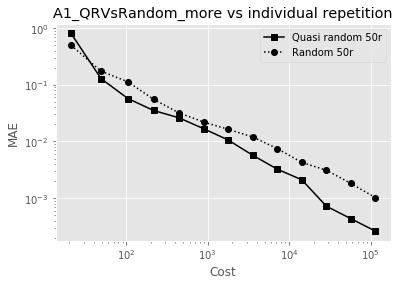

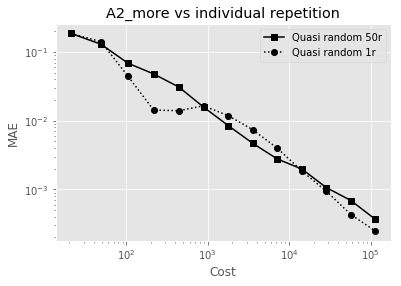

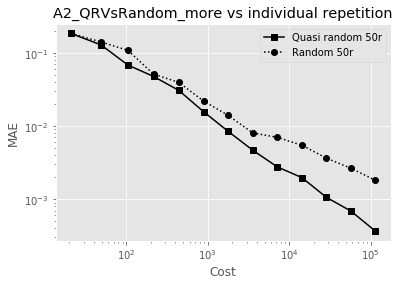

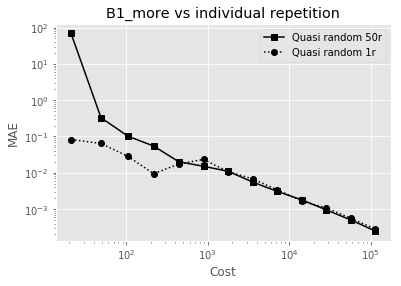

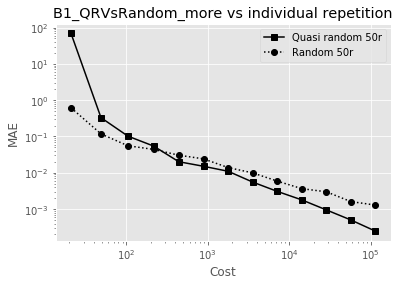

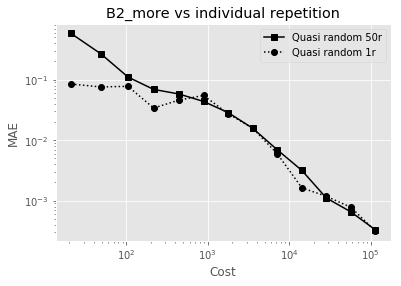

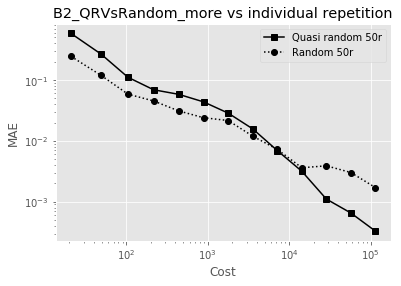

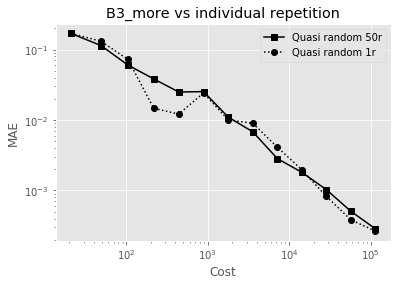

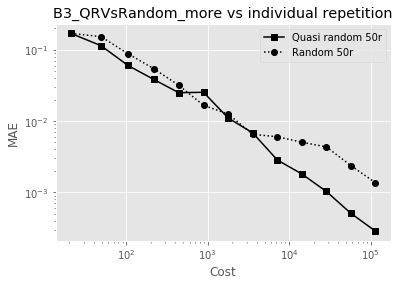

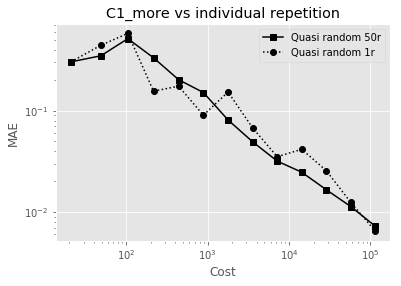

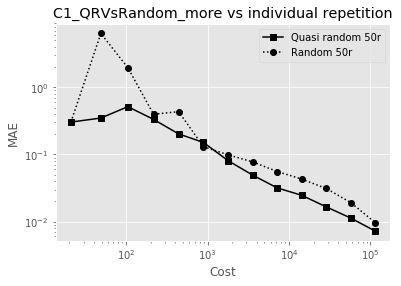

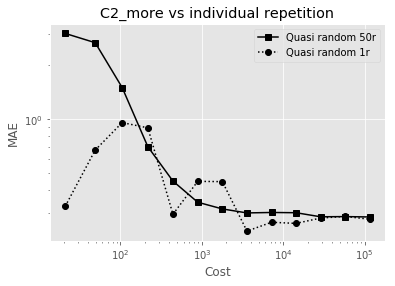

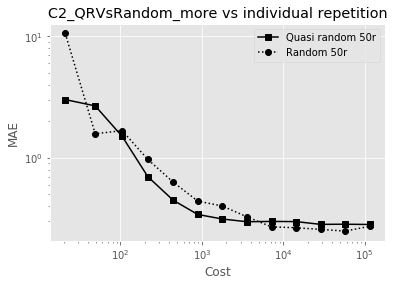

In [38]:
for f in functions:
    elementary_effect = []
    elementary_effect_1r = []
    elementary_effect_rand = []

    ea = pd.DataFrame(f(df_r.iloc[:,:k]))
    ea_rand = pd.DataFrame(f(df_rand.iloc[:,:k]))
    
    ee_df =[]
    ee_df_rand =[]
    
    # elementary effects are calculated for each of the six variables, first and total-order effects are calculated for quasi-
    #random and random sequences

    for j in range(k):
        rs = df_r.iloc[:,:2*k].copy()
        rs_rand = df_rand.iloc[:,:2*k].copy()
        rs[j] = rs[scrambler(j,k)]
        rs_rand[j] = rs_rand[scrambler(j,k)]
        ee = pd.DataFrame(0.5*(f(df_r)-f(rs.iloc[:,:k]))**2,columns=[j])
        ee_rand = pd.DataFrame(0.5*(f(df_rand)-f(rs_rand.iloc[:,:k]))**2,columns=[j])
        ee['r']= [r for r in range(run) for rdf in range(len(df))]
        ee_rand['r']=ee['r']
        ea['r']=ee['r']
        ea_rand['r']=ee['r']
        ee_df.append(ee[j])
        ee_df_rand.append(ee_rand[j])
        
        elementary_effect.append(ee.groupby('r')[j].expanding(1).mean())
        elementary_effect_1r.append(ee[ee.r==0][j].expanding(1).mean())
        elementary_effect_rand.append(ee.groupby('r')[j].expanding(1).mean())
    
    elementary_effect_df = pd.concat(elementary_effect,axis=1)
    elementary_effect_df_1r = pd.concat(elementary_effect_1r,axis=1)
    elementary_effect_df_rand = pd.concat(elementary_effect_rand,axis=1)
    
    Var_df = ea.groupby('r')[0].expanding(1).var(ddof=0)
    Var_df_1r = ea[ea.r==0][0].expanding(1).var(ddof=0)
    Var_df_rand = ea_rand.groupby('r')[0].expanding(1).var(ddof=0)
    
    AE = np.abs(elementary_effect_df.div(Var_df,axis=0) - AE_df.loc[f.__name__])
    AE_1r = np.abs(elementary_effect_df_1r.div(Var_df_1r,axis=0) - AE_df.loc[f.__name__])
    AE_rand = np.abs(elementary_effect_df_rand.div(Var_df_rand,axis=0) - AE_df.loc[f.__name__])
    
    AE.index = AE.index.droplevel(0)
    AE_rand.index = AE.index
    
    AE_f = AE.groupby(AE.index).mean()
    AE_f_rand = AE_rand.groupby(AE_rand.index).mean()
    
    MAE = AE_f.mean(axis=1)
    MAE_rand = AE_f_rand.mean(axis=1)
    MAE_1r = AE_1r.mean(axis=1)
    
    MAE.index = (MAE.index+1)*(k+1)
    MAE_1r.index = (MAE_1r.index+1)*(k+1)
    MAE_rand.index = (MAE_rand.index+1)*(k+1)
    
    #print out the results
    plt.loglog(MAE.index[[-2+2**s for s in range(2,p+1)]], MAE.iloc[[-2+2**s for s in range(2,p+1)]], c='k', 
               marker = 's', linestyle='-',label = 'Quasi random 50r')
    plt.loglog(MAE_1r.index[[-2+2**s for s in range(2,p+1)]], MAE_1r.iloc[[-2+2**s for s in range(2,p+1)]], c='k', 
               marker = 'o', linestyle=':',label = 'Quasi random 1r')
    plt.xlabel('Cost')
    plt.ylabel('MAE')
    plt.title(f.__name__+'_more vs individual repetition')
    plt.legend()
    plt.show()
    
    plt.loglog(MAE.index[[-2+2**s for s in range(2,p+1)]], MAE.iloc[[-2+2**s for s in range(2,p+1)]], c='k', 
               marker = 's', linestyle='-',label = 'Quasi random 50r')
    plt.loglog(MAE_rand.index[[-2+2**s for s in range(2,p+1)]], MAE_rand.iloc[[-2+2**s for s in range(2,p+1)]], c='k', 
               marker = 'o', linestyle=':',label = 'Random 50r')
    plt.xlabel('Cost')
    plt.ylabel('MAE')
    plt.title(f.__name__+'_QRVsRandom_more vs individual repetition')
    plt.legend()
    plt.show()